In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imshow
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
print ('Training Data')
X_train = pd.read_csv('X_test_sat4.csv') # training data
print ('Loading labels')
Y_train = pd.read_csv('y_test_sat4.csv') # y contain label data 

Training Data
Loading labels


In [3]:
X_train = X_train.as_matrix()
Y_train = Y_train.as_matrix()
print ('We have',X_train.shape[0],'examples and each example is a list of',
       X_train.shape[1],'numbers with',
       Y_train.shape[1],'possible classifications.')

We have 99999 examples and each example is a list of 3136 numbers with 4 possible classifications.


C:\Users\shakt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\shakt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
X_train_img = X_train.reshape([99999,28,28,4]).astype(float) # reshaping the data it has 4 classifiaction type in the dataset
print (X_train_img.shape)

(99999, 28, 28, 4)


C:\Users\shakt\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


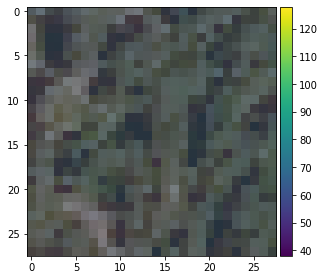

Trees


In [5]:
 ix = 10  #training data and the input
imshow(np.squeeze(X_train_img[ix,:,:,0:3]).astype('int32')) #Only seeing the RGB channels
plt.show()
#Tells what the image is
if Y_train[ix,0] == 1:
    print ('Barren Land')
elif Y_train[ix,1] == 1:
    print ('Trees')
elif Y_train[ix,2] == 1:
    print ('Grassland')
else:
    print ('Other')

In [6]:
model = Sequential([
    Dense(4, input_shape=(3136,), activation='softmax'),
#     Dense(4, input_shape=(3136,), activation='sigmoid'),
#     Dense(4, input_shape=(3136,), activation='relu')
])

In [7]:
X_train = X_train/255

In [8]:
# vanilla artificial neural network
# multi classs classififcation => categorical_crossentropy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_train,Y_train,batch_size=32, epochs=5, verbose=1, validation_split=0.01) # more epoch may give the more accuracy 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 12548     
Total params: 12,548
Trainable params: 12,548
Non-trainable params: 0
_________________________________________________________________
Train on 98999 samples, validate on 1000 samples
Epoch 1/5
98999/98999 [==============================] - 20s 207us/step - loss: 0.7581 - accuracy: 0.6880 - val_loss: 0.7650 - val_accuracy: 0.6150
Epoch 2/5
98999/98999 [==============================] - 19s 193us/step - loss: 0.6707 - accuracy: 0.7203 - val_loss: 0.7091 - val_accuracy: 0.6780
Epoch 3/5
98999/98999 [==============================] - 19s 191us/step - loss: 0.6640 - accuracy: 0.7208 - val_loss: 0.5954 - val_accuracy: 0.7660
Epoch 4/5
98999/98999 [==============================] - 19s 193us/step - loss: 0.6528 - accuracy: 0.7271 - val_loss: 0.7567 - val_accuracy: 0.6770
Epo

In [9]:
preds = model.predict(X_train[-1000:], verbose=1)

1000/1000 [==============================] - 0s 90us/step


C:\Users\shakt\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


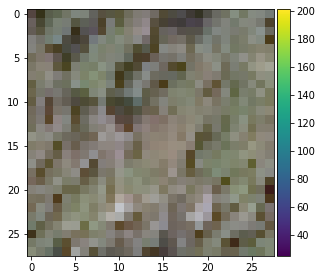

Prediction:
0.34% Probability barren land,
39.16% Probability trees,
51.03% Probability grassland,
9.48% Probability other

Final Conclusion: Trees


In [10]:
ix = 10 #input number in range 0 99999 // 99999 last set of data in dataset
imshow(np.squeeze(X_train_img[99999-(1000-ix),:,:,0:3]).astype('int32')) #Only seeing the RGB channels
plt.show()
#give the image is?
print ('Prediction:\n{:.2f}% Probability barren land,\n{:.2f}% Probability trees,\n{:.2f}% Probability grassland,\n{:.2f}% Probability other\n'.format(preds[ix,0]*100,preds[ix,1]*100,preds[ix,2]*100,preds[ix,3]*100))

print ('Final Conclusion: ',end='')
if Y_train[99999-(1000-ix),0] == 1:
    print ('Barren Land')
elif Y_train[99999-(1000-ix),1] == 1:
    print ('Trees')
elif Y_train[99999-(1000-ix),2] == 1:
    print ('Grassland')
else:
    print ('Other')